### Outliers
* **Point outliers**: observations anomalous with respect to the majority of observations in a feature (aka univariate outlier)
* **Contextual outliers**: observations considered anomalous given a specific context
* **Collective outliers**

### Outlier Detection

* **Tukey Boxplot**: Boxplot whiskers are set at 1.5(IQR). if you see data points pas these whiskers they are outliers
* **Scatter Plot Metrices**: Scatter plot metrices helps to detect outliers
* **DBSCAN**: Clustering method to detect outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
arr = np.array([25, 28, 29, 29, 30, 34, 35, 35, 37, 38])
df = pd.DataFrame(arr)

<AxesSubplot:>

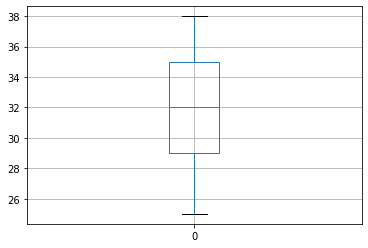

In [3]:
df.boxplot()

<AxesSubplot:>

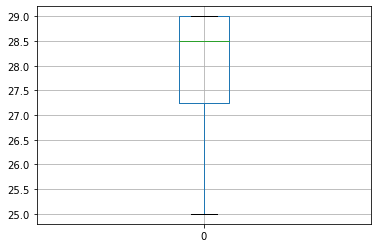

In [4]:
df.iloc[:4,:].boxplot()

In [5]:
arr

array([25, 28, 29, 29, 30, 34, 35, 35, 37, 38])

In [6]:
arr[:5].mean()

28.2

In [7]:
arr[5:].mean()

35.8

In [8]:
iris = pd.read_csv('data/iris.csv')

In [9]:
iris_df = iris.drop(['Unnamed: 0'], axis=1)
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
import seaborn as sb

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

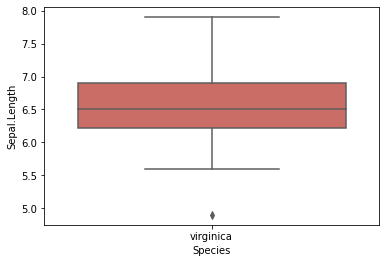

In [11]:
sb.boxplot(x='Species', y='Sepal.Length', data=iris_df[iris_df.Species == 'virginica'], palette='hls')

In [13]:
iris_df['Sepal.Length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal.Length, dtype: float64

<AxesSubplot:>

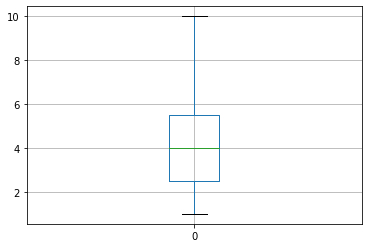

In [25]:
df = pd.DataFrame([1,2,3,4,5,6,10])
df.boxplot()

### DBSCAN

In [26]:
import sklearn
from sklearn.cluster import DBSCAN

In [31]:
data = iris_df.iloc[:,:4].values

In [33]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print (model)

DBSCAN(eps=0.8, min_samples=19)


In [34]:
data.shape

(150, 4)

In [41]:
outliers_df = iris_df[model.labels_==-1]
outliers_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
98,5.1,2.5,3.0,1.1,versicolor
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica


In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'DBSCAN Outliers')

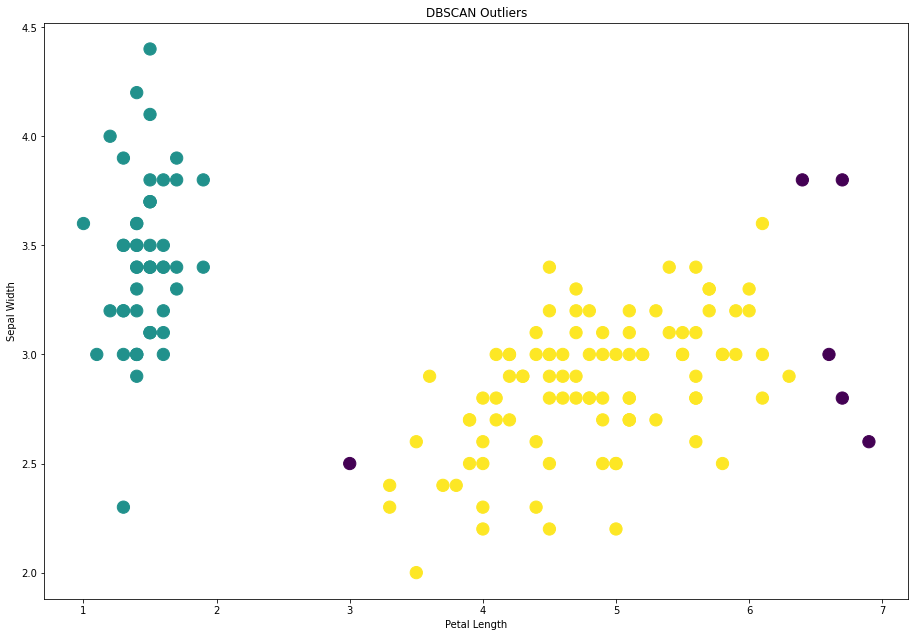

In [52]:
colors = model.labels_
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])

ax.scatter(data[:,2], data[:,1],c=colors, s=150)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("DBSCAN Outliers")

In [53]:
from collections import Counter

In [54]:
Counter(model.labels_)

Counter({0: 50, 1: 94, -1: 6})

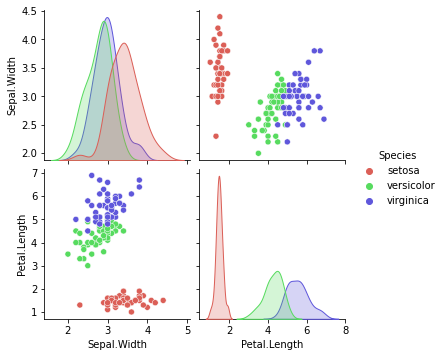

In [75]:
sb.pairplot(iris_df[['Sepal.Width','Petal.Length','Species']], hue="Species", palette='hls')

In [150]:
def xrange(low, high, quarter):
    if quarter == 1 or quarter == 3:
        return low,high
    elif quarter == 2 or quarter == 4:
        return -high,-low

def yrange(low, high, quarter):
    if quarter == 1 or quarter == 2:
        return low,high
    elif quarter == 3 or quarter == 4:
        return -high,-low

In [172]:
def generate_data_set_in_range(low,high,quarter,pts=10):
    data = set()
    xr = xrange(low,high,quarter)
    yr = yrange(low,high,quarter)
    for i in range(0,pts):
        x = np.random.randint(xr[0],xr[1])
        for j in range(0,pts):
            y = np.random.randint(yr[0],yr[1])
            data.add((x,y))
    return list(data)

In [173]:
type(yrange(2,5,2))

tuple

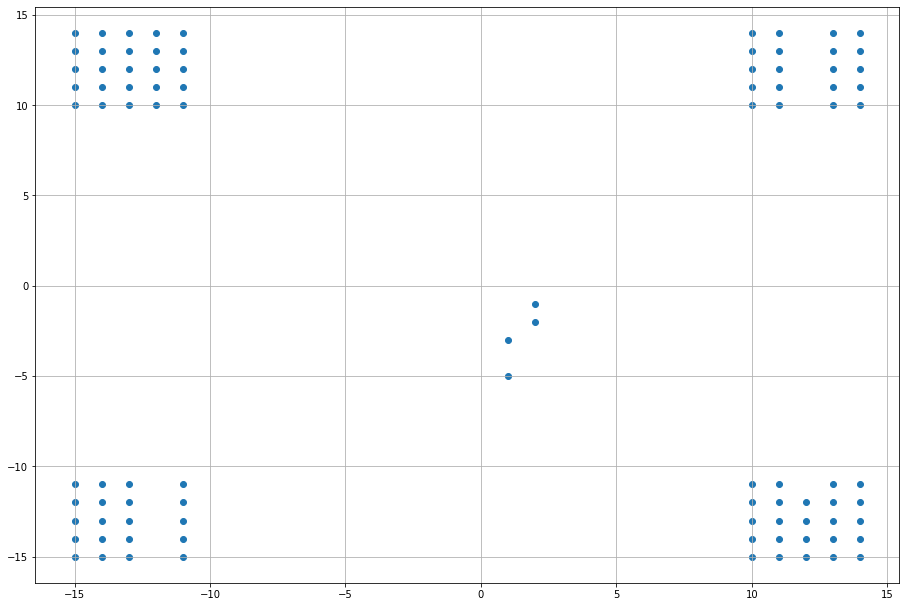

In [175]:
a = generate_data_set_in_range(10,15,1)
b = generate_data_set_in_range(10,15,2)
c = generate_data_set_in_range(10,15,3)
d = generate_data_set_in_range(10,15,4)
noise = generate_data_set_in_range(0,5,3,2)
data = np.array(a + b + c + d + noise)
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])
ax.grid()
plt.scatter(x=data[:,0], y=data[:,1])

In [188]:
df = pd.DataFrame(data)

## DBSCAN

In [189]:
model = DBSCAN(eps=5, min_samples=10).fit(df)
model

DBSCAN(eps=5, min_samples=10)

In [190]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3, -1, -1, -1, -1])

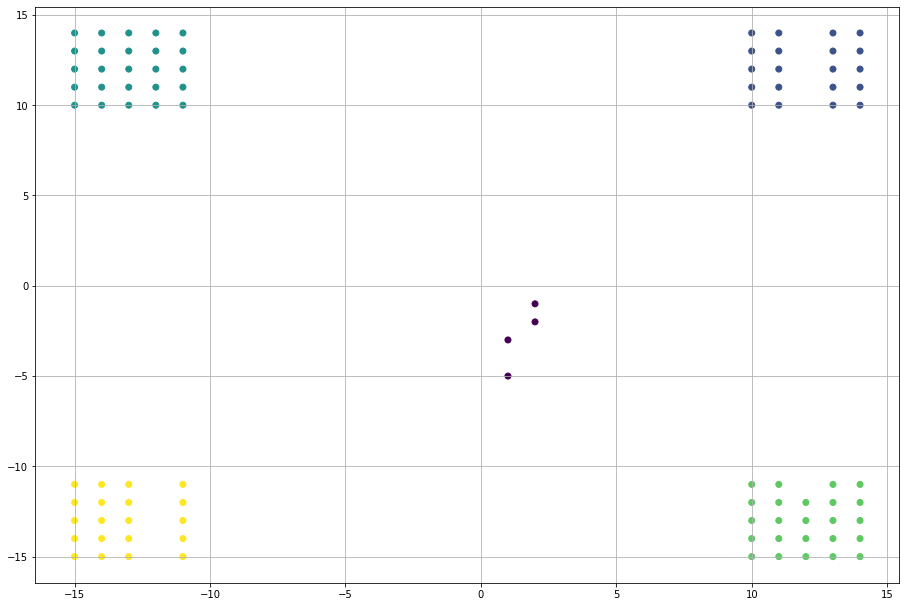

In [191]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])
ax.grid()
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1], c=model.labels_)

In [192]:
df[model.labels_ == -1]

,0,1
89,1,-5
90,2,-2
91,1,-3
92,2,-1


In [193]:
Counter(model.labels_)

Counter({0: 20, 1: 25, 2: 24, 3: 20, -1: 4})

In [227]:
def generate_random_data(pts=10):
    data = set()
    for i in range(0,pts):
        data.add((np.random.randint(-100,100),np.random.randint(-100,100)))
    return list(data)

In [235]:
data = generate_random_data(500)

In [236]:
data = np.array(data)

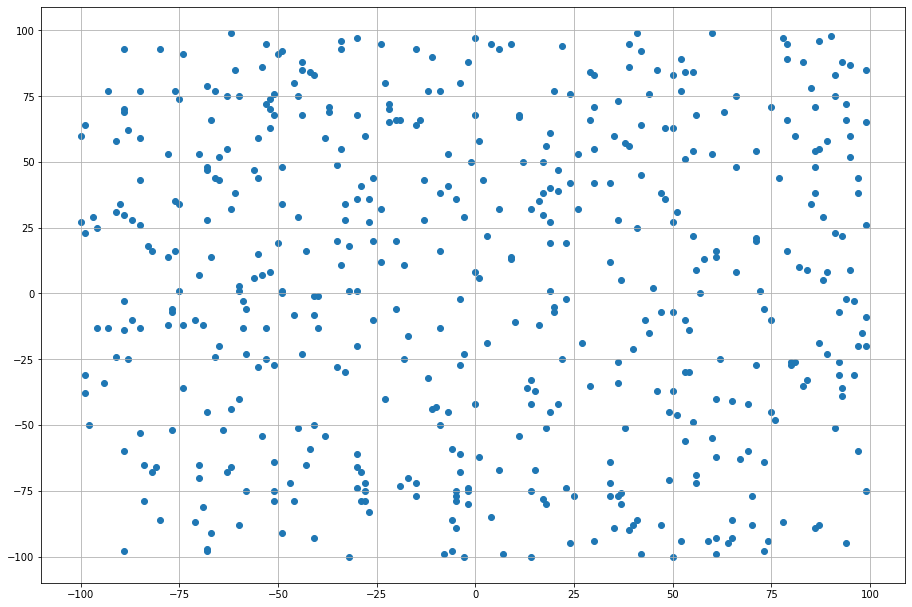

In [237]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])
ax.grid()
plt.scatter(x=data[:,0], y=data[:,1])

In [239]:
df = pd.DataFrame(data)

In [273]:
model = DBSCAN(eps=16, min_samples=10).fit(df)
model

DBSCAN(eps=16, min_samples=10)

In [274]:
Counter(model.labels_)

Counter({1: 58, 0: 244, 2: 29, -1: 35, 3: 68, 4: 32, 5: 19, 6: 13})

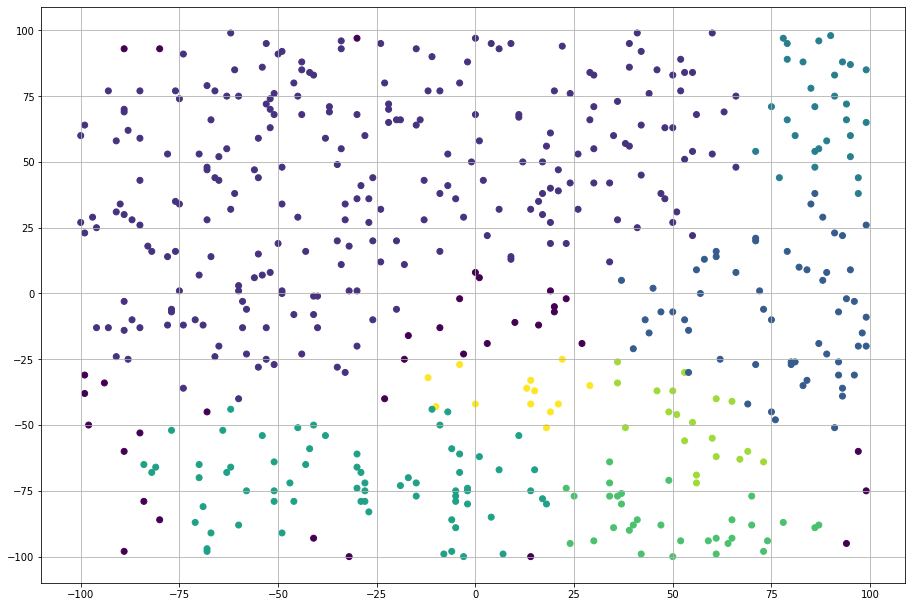

In [275]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])
ax.grid()
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1],c= model.labels_)

In [276]:
df[model.labels_==-1].describe()

,0,1
count,35.000000,35.000000
mean,-22.514286,-28.371429
std,57.304333,50.735233
min,-99.000000,-100.000000
25%,-82.000000,-60.000000
50%,-17.000000,-25.000000
75%,15.000000,-6.000000
max,99.000000,97.000000


In [278]:
df['cid'] = model.labels_

<Axes:xlabel='0', ylabel='1'>

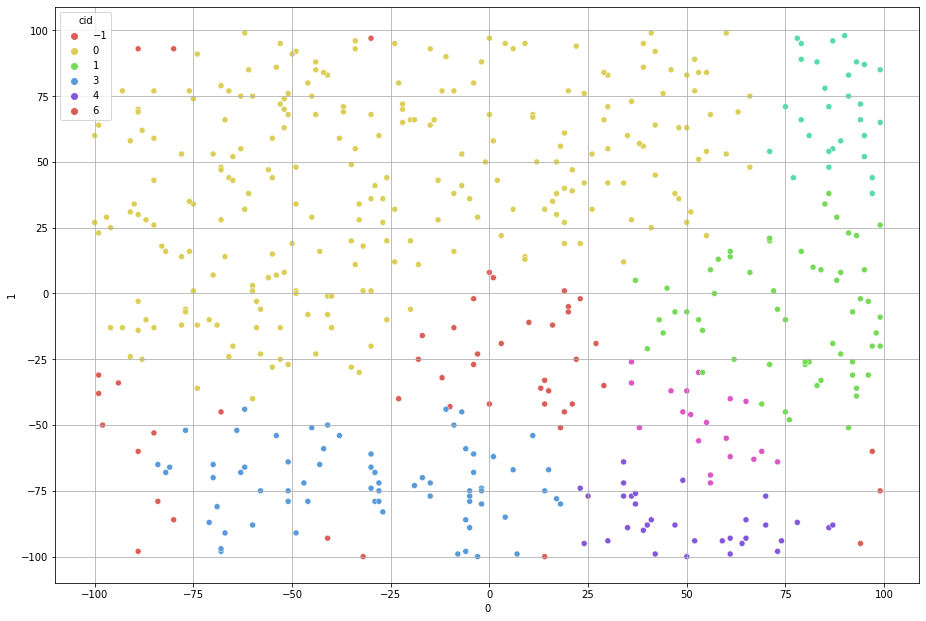

In [284]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,2])
ax.grid()
sb.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1],data=df, hue='cid', palette='hls')